In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
974,148.1,0.0,182.1,181.4,15.0,838.9,884.3,28,15.53


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=.3, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.5943782479239204


In [13]:
lr = LinearRegression()
np.mean(cross_val_score(lr, x, y , scoring='r2'))

np.float64(0.4609940491662866)

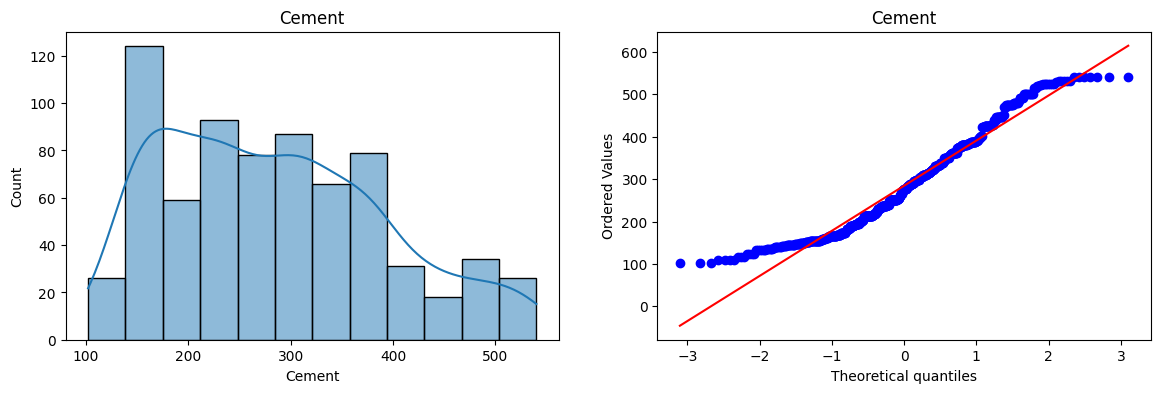

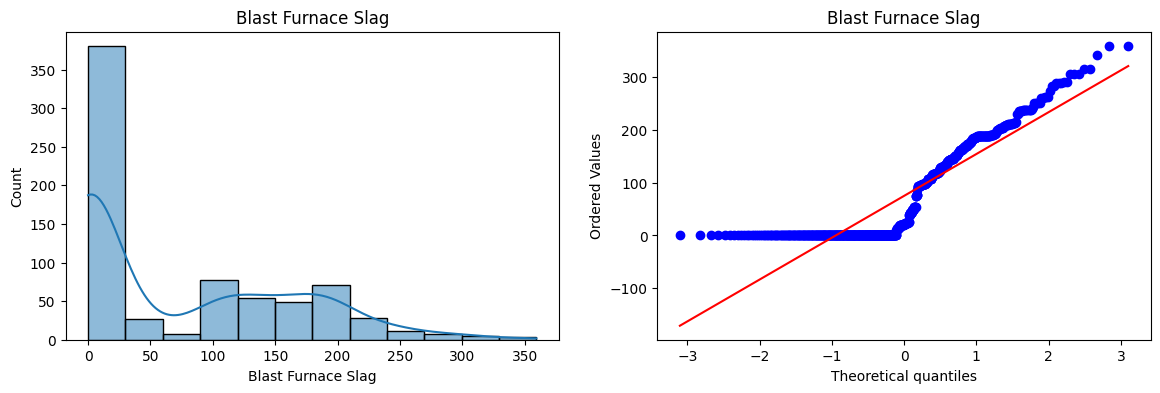

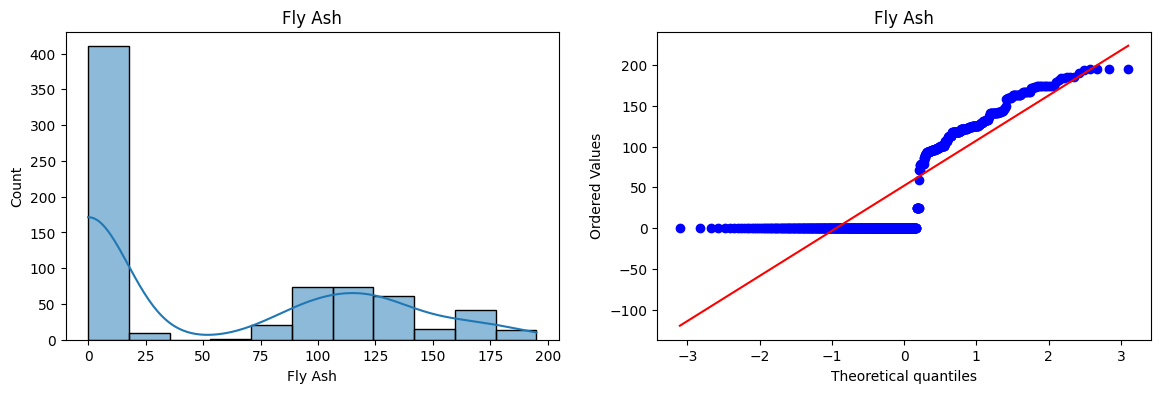

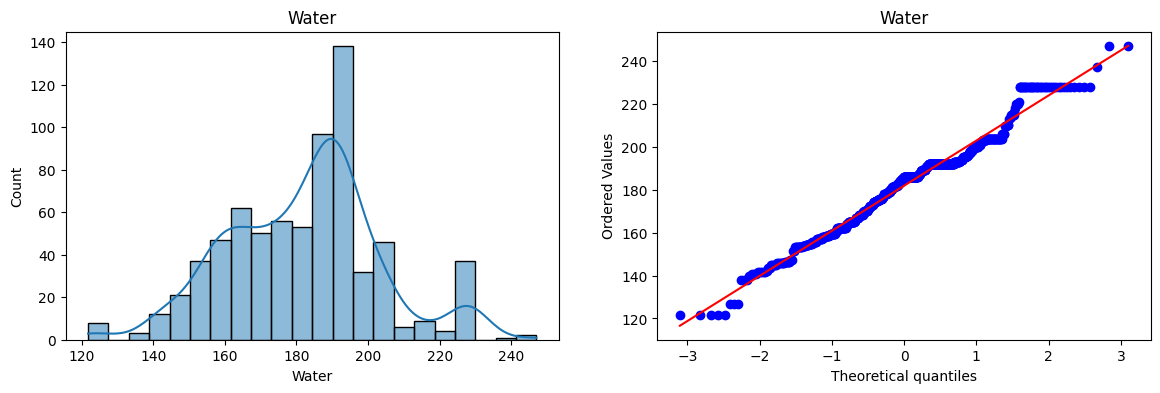

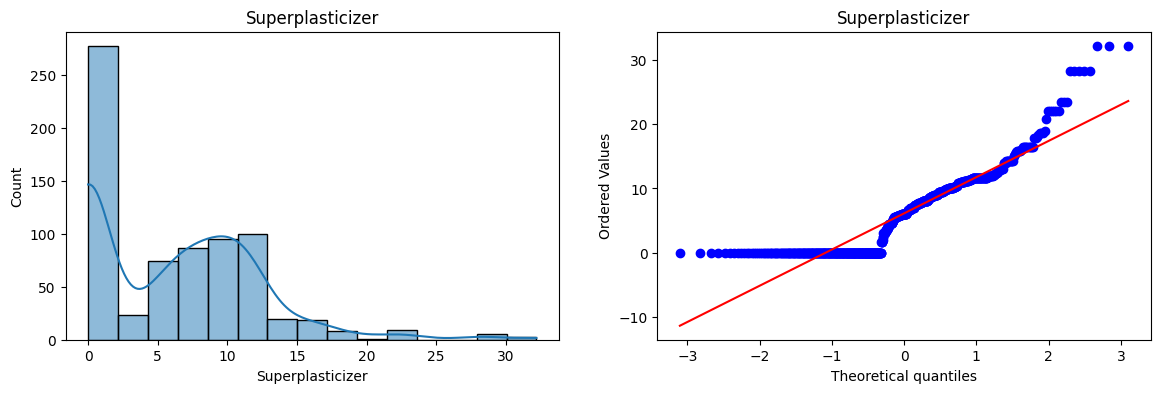

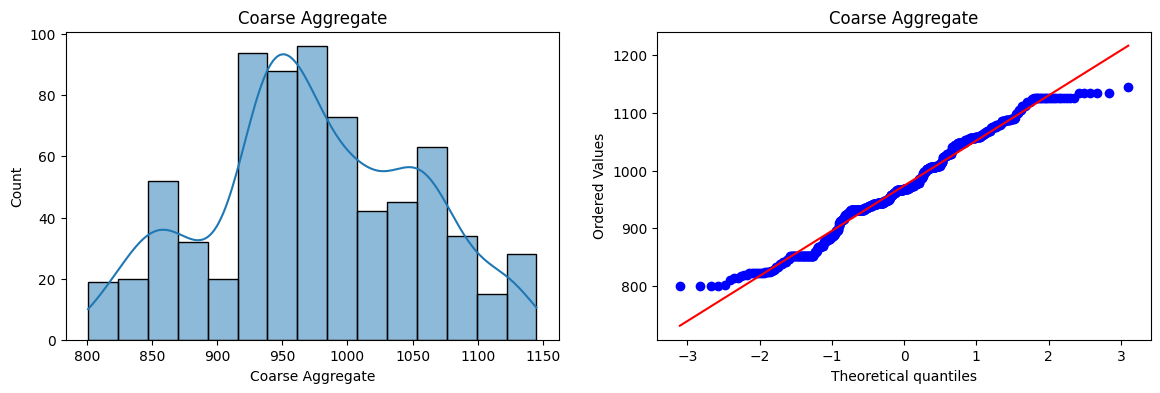

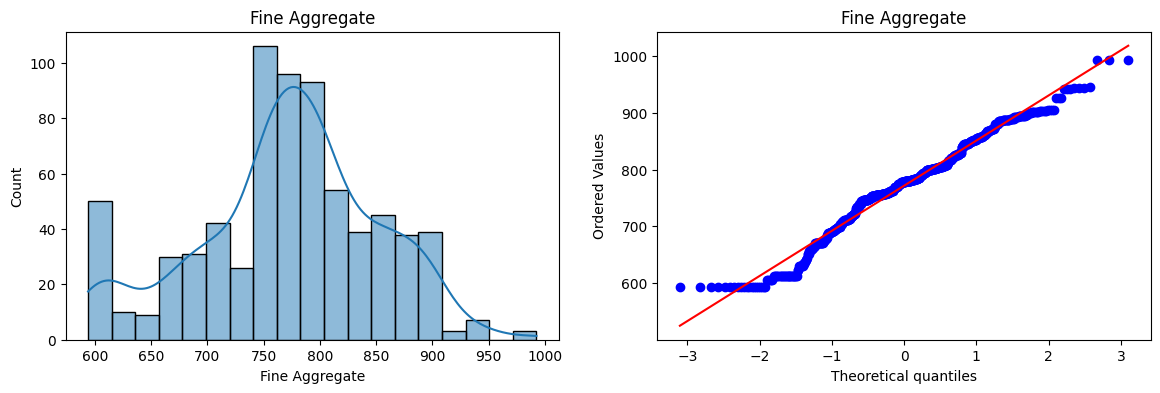

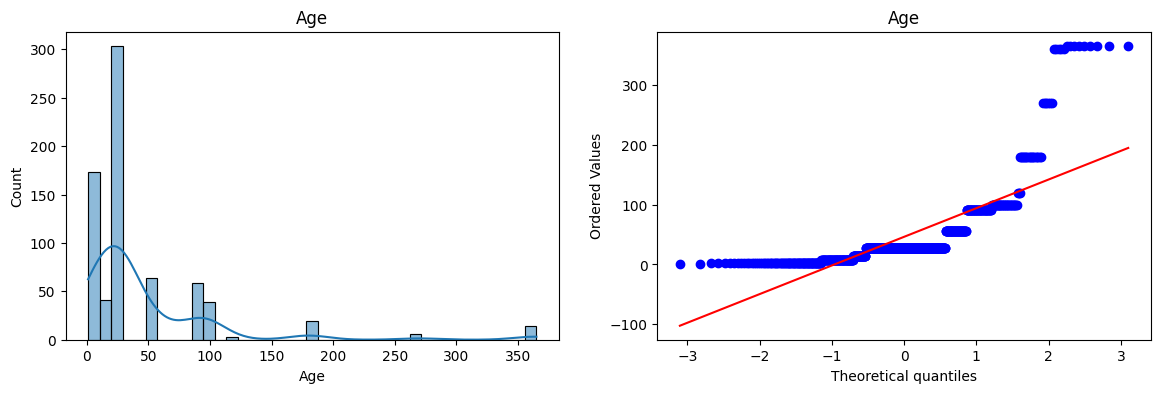

In [14]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)

In [16]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+.0000001)
x_test_transformed = pt.transform(x_test+.0000001)

pd.DataFrame({'col':x_train.columns, 'box_cox_lambdas':pt.lambdas_})



,col,box_cox_lambdas
0,Cement,0.193476
1,Blast Furnace Slag,0.023377
2,Fly Ash,-0.040058
3,Water,0.853461
4,Superplasticizer,0.082083
5,Coarse Aggregate,1.040260
6,Fine Aggregate,1.890557
7,Age,0.071532


In [19]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2 = lr.predict(x_test_transformed)
r2_score(y_test, y_pred2)

0.7904475002397793

In [24]:
pt1 = PowerTransformer('box-cox')
x_trans = pt1.fit_transform(x+.0000001)
lr = LinearRegression()
np.mean(cross_val_score(lr,x_trans, y, scoring='r2'))

np.float64(0.6658537935430975)

In [25]:
pt2 = PowerTransformer('yeo-johnson')

x_train_with_YJ = pt2.fit_transform(x_train)
x_test_with_YJ = pt2.transform(x_test)


In [26]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)

y_pred_YJ = lr.predict(x_test_transformed)

r2_score(y_test, y_pred_YJ)

0.7904475002397793

In [27]:
x_trans_YJ = pt2.fit_transform(x)

lr = LinearRegression()

np.mean(cross_val_score(lr, x_trans_YJ, y ,scoring='r2'))

np.float64(0.6834625141500865)

In [28]:
x_trans_YJ = pd.DataFrame(x_trans_YJ, columns=x_train.columns)

In [29]:
x_trans_YJ.head(4)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692


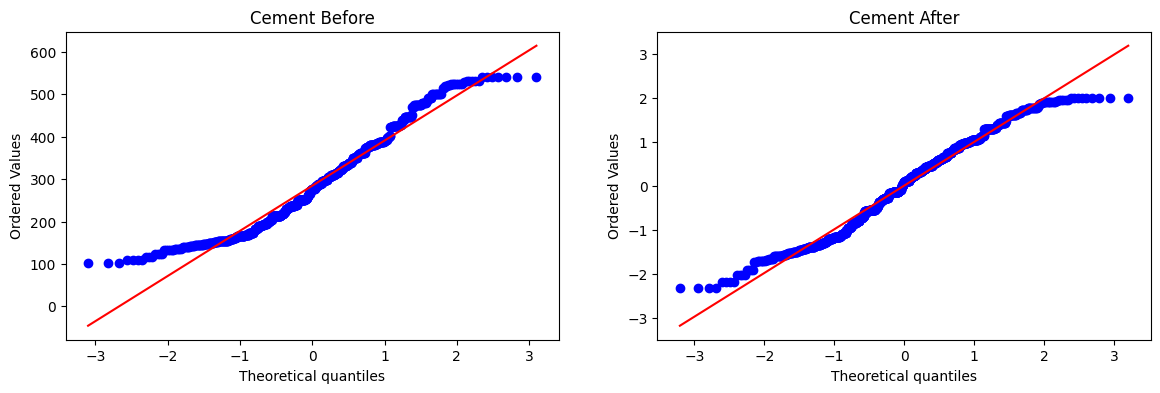

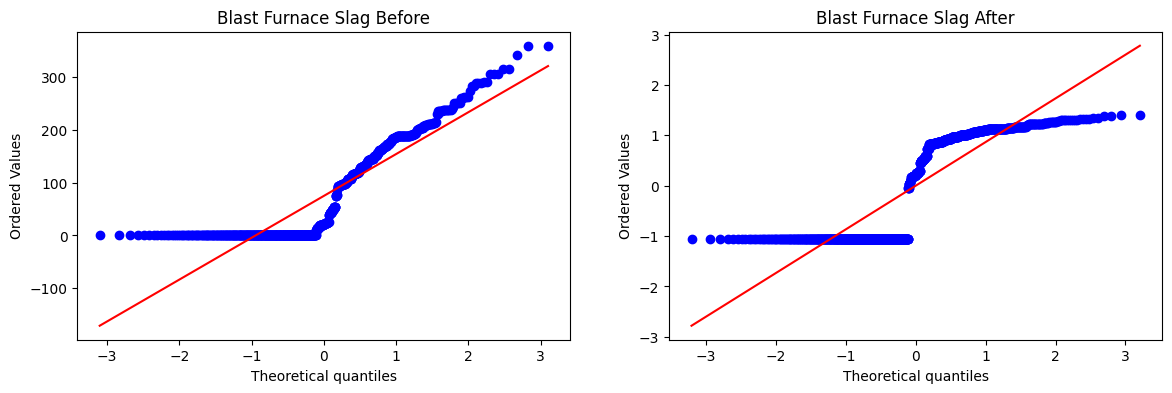

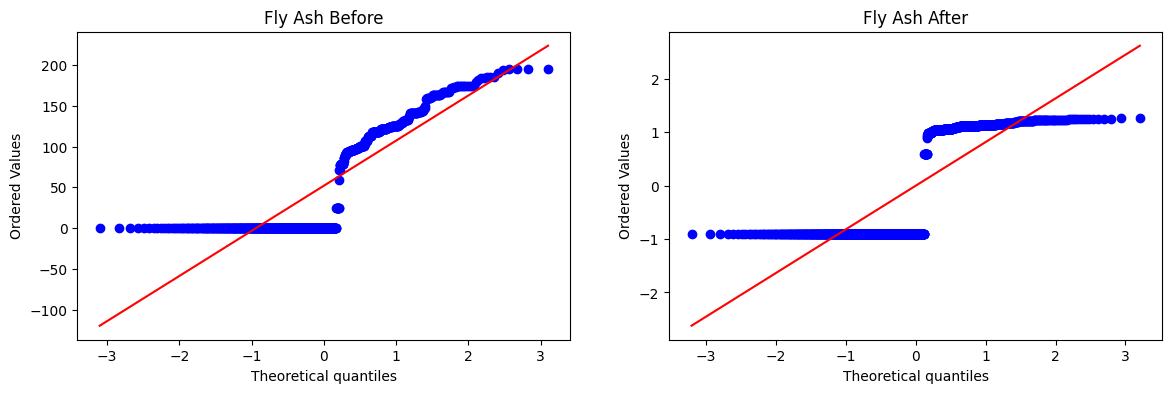

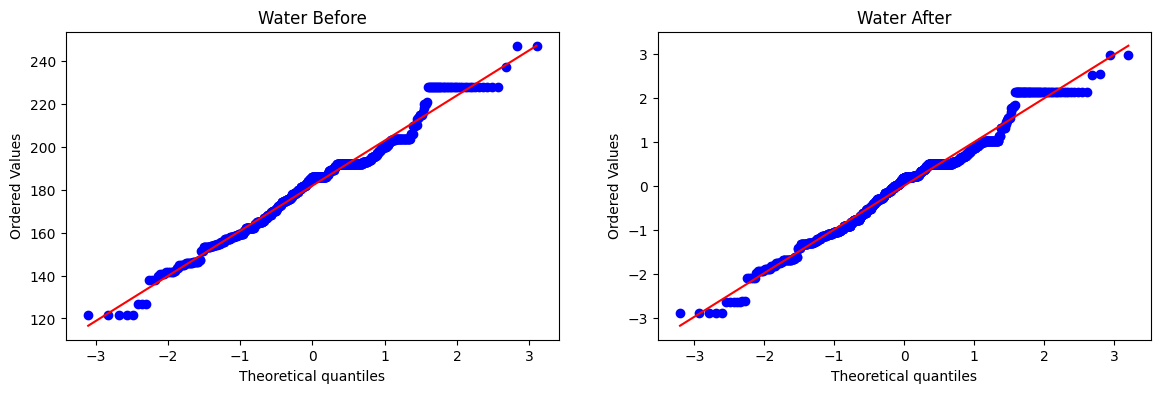

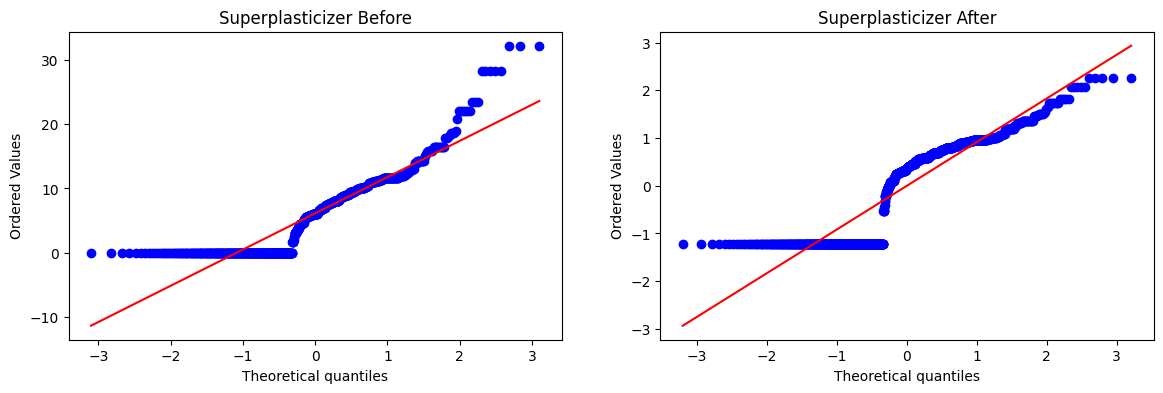

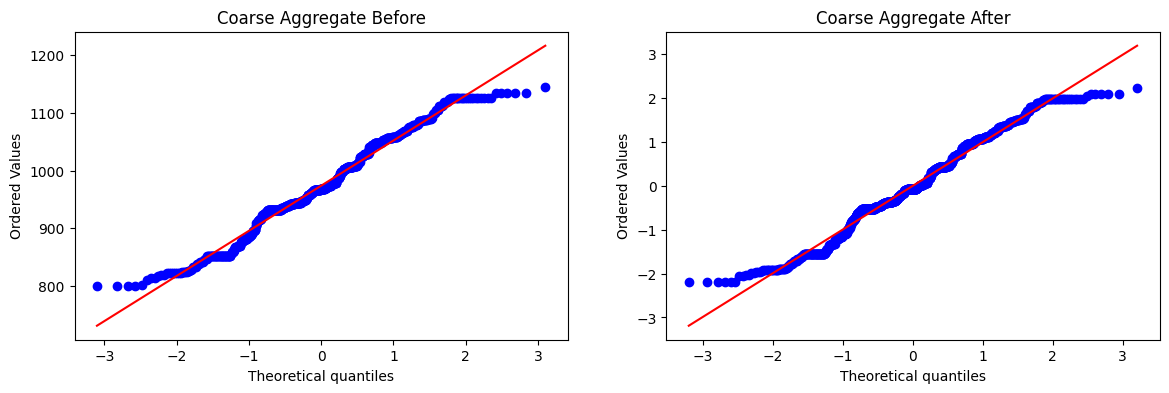

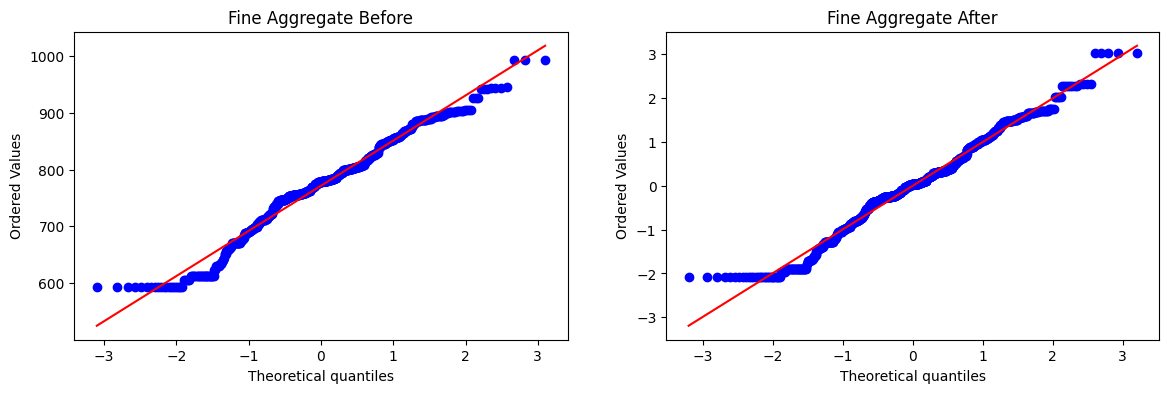

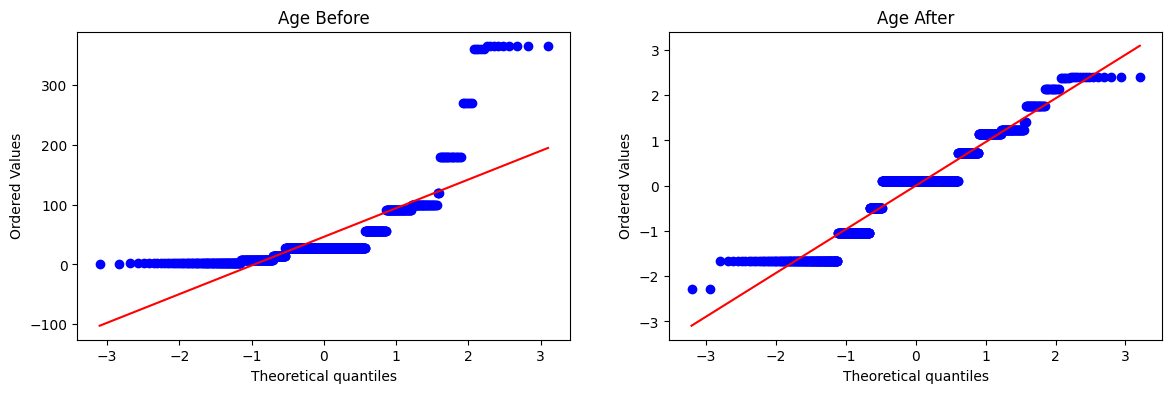

In [32]:
for col in x_trans_YJ.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col+' Before')

    plt.subplot(122)
    stats.probplot(x_trans_YJ[col], dist='norm', plot=plt)
    plt.title(col + ' After')

    plt.show()